|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Navneet  | Robin | Navneet Robin,  08-11-2024 | 6 hours | 25% |
| Member 2: | Mahweer | Kumar | Mahweer Kumar, 08-11-2024 |6 hours | 25% |
| Member 3: | Jalelle  | Dinka | Jalelle Dinka, 08-11-2024 | 6 hours | 25% |
| Member 4: | Leanne | Lane | Leanne Lane, 08-11-2024 | 6 hours | 25% |


# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 3: Introduction to Machine Learning (Gradient Descent, Logistic Regression)*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

# **Non-linear Gradient Descent (25 marks)**

### **Observations:** Pseudorange [m]

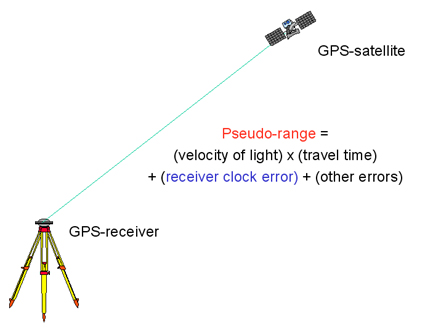

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them using Gradient Descent method


.

###Step 0: Setup & Intialization

Step 0.1: Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Step 0.2: Read and parse data files

In [ ]:
df_pseudorange = pd.read_excel('/content/sample_data/pseudoranges1.xlsx')
df_sat_pos = pd.read_excel('/content/sample_data/satellite_position1.xlsx')

pseudorange = df_pseudorange['P'].to_numpy()
sat_pos =df_sat_pos[['x','y','z']].to_numpy()

n = pseudorange.size



Step 0.3: Define the groundtruth of receiver's position in ECEF (m)

In [ ]:
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

Step 0.4: Intialize empty arrays

In [ ]:
arr_cost= []
arr_grad= []
arr_err=[]
steps_count=0




Step 0.5: Function that
computes the euclidean distance between satellite and receiver

In [ ]:
def euclidean_norm(receiver_pos, satellite_pos):

    # Calculate the Euclidean norm (distance)
    distance = np.linalg.norm(satellite_pos - receiver_pos, axis =1)

    return distance


### Step 1: Define the Cost Function (4 marks)
Define a cost function that computes the sum of squared residuals between measured and predicted pseudoranges.

The function's inputs are: the receiver's coordinates, clock offset, satellites' coordinates, observed pseudoranges.

The function returns a single scalar.

Call euclidean_norm function to calculate geometric distance.

In [ ]:
# Cost function: sum of squared residuals between measured and predicted pseudoranges
def cost_function(r_pos, cdT, s_pos, pseudorange):
    predicted_pseudorange = euclidean_norm(r_pos, s_pos) + cdT
    residuals = pseudorange - predicted_pseudorange
    L = np.sum(residuals ** 2)
    return L


### Step 2: Define the Gradient Computation Function (4 marks)

Define a gradient computation function that calculates the gradient of the cost function with respect to the estimates (x_r, y_r, z_r, cdT).


The function's inputs are: the receiver's coordinates, clock offset, satellites' coordinates, observed pseudoranges.


The function returns a 1D numpy array that contains 4 elements.


Call euclidean_norm function to calculate geometric distance.


In [ ]:
# Gradient of the cost function with respect to the unknowns (x_r, y_r, z_r, cdT)
def gradient(r_pos, cdT, s_pos, pseudorange):
    distances = euclidean_norm(r_pos, s_pos)
    predicted_pseudorange = distances + cdT
    residuals = pseudorange - predicted_pseudorange
    dL_dx = -np.sum(residuals * (r_pos[0] - s_pos[:, 0]) / distances)
    dL_dy = -np.sum(residuals * (r_pos[1] - s_pos[:, 1]) / distances)
    dL_dz = -np.sum(residuals * (r_pos[2] - s_pos[:, 2]) / distances)
    dL_dcdT = -np.sum(residuals)
    grad = np.array([dL_dx, dL_dy, dL_dz, dL_dcdT])
    return grad


### Step 3: Gradient Descent Implementation (4 marks)
Construct the implementation function of gradient descent

Replace '...' with actual implementation

The function's input are: observed pseudoranges, satellites' positions, learning_rate, maximum loop iterations, tolerance

The function will return a 1D numpy array that contains the optimized estimates (x_r, y_r, z_r, cdT)

The function set learning_rate, max_iters and tolerance as: 0.01, 100000, 1e-6 as default values

These default hyperparameters values can be overridden by passing your own values when calling the function


In [ ]:
# Gradient descent algorithm for non-linear least squares estimation
def gradient_descent(pseudorange, s_pos, learning_rate=0.1, max_iters=10000, tolerance=1e-6):

    global steps_count

    #initalize the estimates as zeros
    X = np.array([0,0,0,0])

    for iteration in range(max_iters):
        r_pos = X[:3]
        cdT = X[3]

        # compute the cost in the current step
        # (1 mark)
        current_cost = cost_function(r_pos, cdT, s_pos, pseudorange)

        # compute the gradients in the current step
        # (1 mark)
        grad = gradient(r_pos, cdT, s_pos, pseudorange)


        # update estimates
        # (1 mark)
        X_new = X - learning_rate * grad

        # compute the new cost
        # (1 mark)
        new_cost = cost_function(X_new[:3], X_new[3], s_pos, pseudorange)

        # break the loop if converge
        if np.abs(new_cost - current_cost) < tolerance:
            print("Converged !")
            steps_count=iteration
            break

        # update the parameters for the next iteration
        X = X_new

        #collect intermediate results for cost and gradients
        arr_cost.append(current_cost)
        arr_grad.append(grad)
        arr_err.append(X[:3]-GroundTruth)

    return X


### Step 4: Parameters Optimization & Results Printing (3 marks)

Call *gradient_descent* function to optimize the estimating parameters using default optimization hyperparameters

Print:

*   optimized parameters
*   final position errors of receiver
*   number of steps taken for convergence
*   final cost value
*   final gradient values








In [ ]:
optimized_params = gradient_descent(pseudorange, sat_pos)
new_cost = cost_function(optimized_params[:3], optimized_params[3], sat_pos, pseudorange)
grad = gradient(optimized_params[:3], optimized_params[3], sat_pos, pseudorange)

# print the mentioned metrics
print("Optimized Parameters:", optimized_params)
print("Position Error:", optimized_params[:3] - GroundTruth)
print("Steps taken for convergence:", steps_count)
print("Final Cost Value:", new_cost)
print("Final Gradient Value:", grad)


Converged !
Optimized Parameters: [-1.63349244e+06 -3.65162954e+06  4.95248543e+06  6.46899086e+00]
Position Error: [-3.06452823 -2.35814083  3.80782687]
Steps taken for convergence: 588
Final Cost Value: 6.1970361882315945
Final Gradient Value: [ 0.00010866  0.00060547 -0.00186084 -0.00105501]


### Step 5: Cost vs Steps Plot & Analysis (2 marks)
Plot cost vs steps

Use 'semilogy' to scale y-axis

Label each axis

Include figure title

Comment on the pattern from the plot

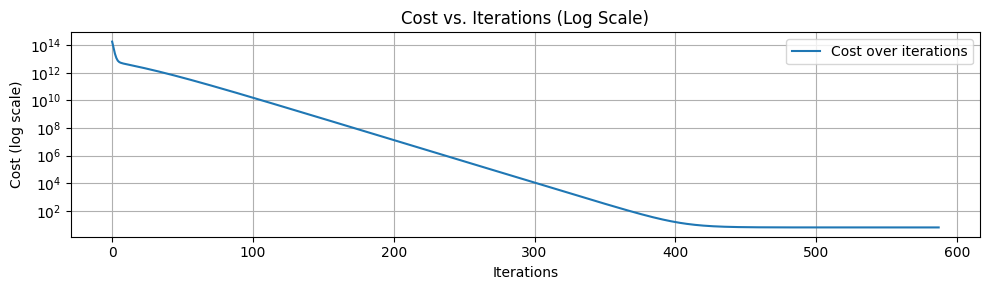

In [ ]:
fig , ax = plt.subplots(nrows=1,ncols=1, figsize=(10,3))
plt.semilogy(arr_cost, label="Cost over iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost (log scale)")
plt.title("Cost vs. Iterations (Log Scale)")
ax.grid(True)
fig.tight_layout()
plt.legend()
plt.show()
# Comment on the pattern
# This pattern indicates that each step is reducing the cost function. the decrease in cost shows the algorithm is making consistent progress toward a minimum, demonstrating a successful reduction in error or residuals over iterations.

### Step 6: Gradients vs Steps & Analysis(2 marks)
Plot gradients vs steps

use 'symlog' to scale y-axis

use 'tick_params' and set y-axis: labelsize=8

include axes' labels, legends and title

Comment on the pattern from the plot

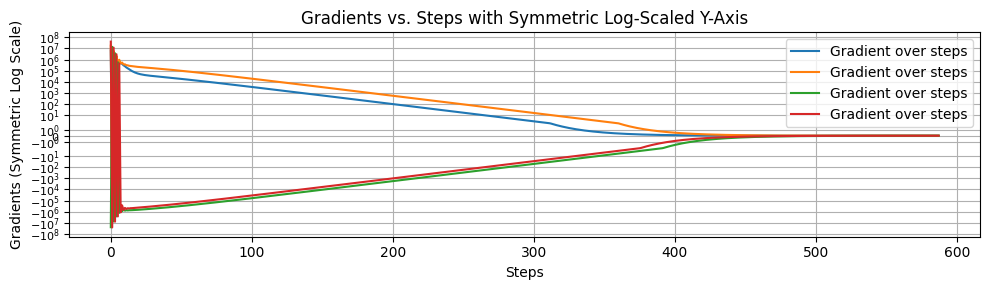

In [ ]:
fig , ax = plt.subplots(nrows=1,ncols=1, figsize=(10,3))
ax.plot(list(range(len(arr_grad))), arr_grad, label="Gradient over steps", )
ax.set_yscale('symlog')  # Symmetric log scale for y-axis
ax.set_xlabel("Steps")
ax.set_ylabel("Gradients (Symmetric Log Scale)")
ax.set_title("Gradients vs. Steps with Symmetric Log-Scaled Y-Axis")
ax.tick_params(axis='y', labelsize=8)  # Set y-axis label size
ax.legend()
ax.grid(True)
fig.tight_layout()
plt.show()

# Comment on the pattern
# The decreasing pattern in the gradient versus iteration plot suggests that the algorithm is progressively converging toward an optimal solution


### Step 7: Positioning errors vs Steps & Analysis(2 marks)
Plot positioning errors vs steps

Include axes' labels, legends and title

Comment on the pattern of the plot

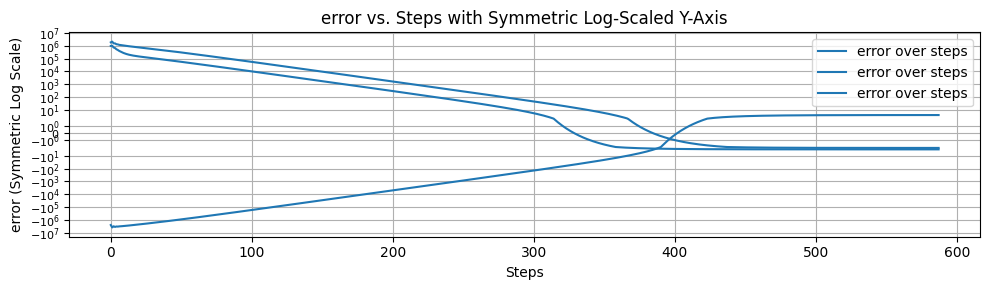

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
ax.plot(list(range(len(arr_err))), arr_err, label="error over steps", color="tab:blue")
ax.set_yscale('symlog')  # Symmetric log scale for y-axis
ax.set_xlabel("Steps")
ax.set_ylabel("error (Symmetric Log Scale)")
ax.set_title("error vs. Steps with Symmetric Log-Scaled Y-Axis")
ax.tick_params(axis='y', labelsize=8)  # Set y-axis label size
ax.legend()
ax.grid(True)
fig.tight_layout()
plt.show()

# Comment on the pattern
# The decreasing pattern in the positioning error versus steps plot indicates that the algorithm is successfully refining the estimated position, with errors reducing as it progresses toward a more accurate solution.


# Hyperparameters Tuning

### Step 8: Tuning Learning rate (2 marks)

Change learning rate to 0.01, 0.001 and repeat step 4.

(*hint: you may need to adjust the maximum loop iterations in this case*)

In [ ]:
#set learning rate to 0.01
#re-initialize arrays and counters
arr_cost= []
arr_grad= []
arr_err=[]
steps_count=0

optimized_params_2 = gradient_descent(pseudorange, sat_pos, learning_rate=0.01)
new_cost = cost_function(optimized_params[:3], optimized_params[3], sat_pos, pseudorange)
grad = gradient(optimized_params[:3], optimized_params[3], sat_pos, pseudorange)

# print the metrics
print("Optimized Parameters:", optimized_params)
print("Position Error:", optimized_params[:3] - GroundTruth)
print("Steps taken for convergence:", steps_count)
print("Final Cost Value:", new_cost)
print("Final Gradient Value:", grad)

Converged !
Optimized Parameters: [-1.63349244e+06 -3.65162954e+06  4.95248543e+06  6.46899086e+00]
Position Error: [-3.06452823 -2.35814083  3.80782687]
Steps taken for convergence: 5652
Final Cost Value: 6.1970361882315945
Final Gradient Value: [ 0.00010866  0.00060547 -0.00186084 -0.00105501]


In [ ]:
#set learning rate to 0.001
#re-initialize arrays and counters
arr_cost= []
arr_grad= []
arr_err=[]
steps_count=0

optimized_params_3 = optimized_params_2 = gradient_descent(pseudorange, sat_pos, learning_rate=0.001,max_iters=55000 )
new_cost = cost_function(optimized_params[:3], optimized_params[3], sat_pos, pseudorange)
grad = gradient(optimized_params[:3], optimized_params[3], sat_pos, pseudorange)

# print the metrics
print("Optimized Parameters:", optimized_params)
print("Position Error:", optimized_params[:3] - GroundTruth)
print("Steps taken for convergence:", steps_count)
print("Final Cost Value:", new_cost)
print("Final Gradient Value:", grad)

Converged !
Optimized Parameters: [-1.63349244e+06 -3.65162954e+06  4.95248543e+06  6.46899086e+00]
Position Error: [-3.06452823 -2.35814083  3.80782687]
Steps taken for convergence: 53291
Final Cost Value: 6.1970361882315945
Final Gradient Value: [ 0.00010866  0.00060547 -0.00186084 -0.00105501]


## Step 9: Results Analysis (2 marks)

Q1. Comment on the difference that you notice after changing the learning rate. (1 mark)

Q2. What is the difference between LSE and Gradient Descent? (Comment based on your results and the methodology) (1 mark)

Answer for Q1:-
The observed differences in convergence steps highlight the trade-off between learning rate and convergence speed: a higher learning rate of 0.1 allows for quicker convergence in just 588 steps, while reducing the learning rate to 0.01 significantly increases the steps to 5652, and further lowering it to 0.001 results in an even more dramatic rise to 53,291 steps. This trend indicates that smaller learning rates lead to finer adjustments in each iteration, which, while improving stability and accuracy, also requires many more iterations to reach convergence.

Answer for Q2:- The key difference between Least Squares Estimation (LSE) and gradient descent lies in their approach to minimizing the cost function. LSE directly computes the optimal solution by minimizing the sum of squared errors, providing an exact solution in a single step when the system is linear. In contrast, gradient descent iteratively adjusts the parameters based on the gradient of the cost function, requiring multiple iterations to converge to a solution.





---
---

# **Logistic Regression (50 marks)**

The following dataset helps to predict phishing webpages. It is collected mainly from: PhishTank archive, MillerSmiles archive, Googleâ€™s searching operators.

It can be downloaded from : https://archive.ics.uci.edu/dataset/327/phishing+websites

<u>Class labels:</u>

Not phishing = -1

Phishing = 1



Follow the steps provided to perform binary classification using logistic regression and complete the code for each part.


### Step 0: Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 1: Data Input (2 mark)

Use the `fetch_ucirepo(id=<ID>)`  to load the phishing dataset (id = 327) as a dataframe into the feature matrix `X` and target vector `y`.

Print the size of `X` and `y`


In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# Below code fetches dataset
phishing_websites = fetch_ucirepo(id=327)

# TO DO: data (as pandas dataframes) (1 mark)
X = phishing_websites.data.features
y = phishing_websites.data.targets

# TO DO: display sizes of X and y (1 mark)
print("Size of X:", X.shape)
print("Size of y:", y.shape)




Size of X: (11055, 30)
Size of y: (11055, 1)


### Step 2.1: Class label histogram (2 marks)

Plot the histogram for each class label to visualise class imbalance. Additionally before calling .show() for the plot, ensure that the code displays you the exact value of the samples for each class above the respective bins.

result
 1    6157
-1    4898
Name: count, dtype: int64


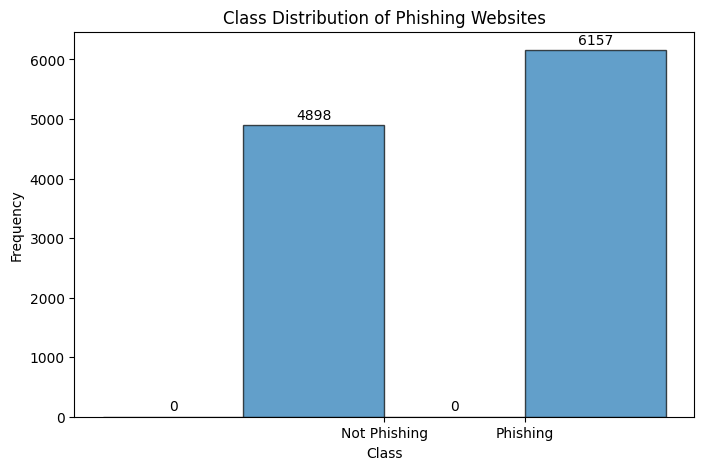

In [ ]:
# TO DO: Check the class distribution of y (2 mark)
class_distribution = pd.Series(y.iloc[:,0]).value_counts()
print(class_distribution)

# TO DO: Plot the histogram (2 mark)
plt.figure(figsize=(8, 5))
count,bins, patches = plt.hist(y, bins=[-2, -1, 0, 1, 2], align='left',edgecolor='black',alpha =0.7)

#plt.hist(y, bins=2, edgecolor='black')

# Adding labels
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution of Phishing Websites')
plt.xticks([-0.5, 0.5], ['Not Phishing', 'Phishing'])

# Plot histogram

for count, bin_edge in zip(count, bins):
    plt.text(bin_edge, count + 100, str(int(count)), ha='center')

plt.show()

### Step 2.2: Smaller dataset creation(2 mark)


We also want to test if the model would still work if we used less data. Use the `train_test_split` function from sklearn to create a new feature matrix named `X_small` and a new target vector named `y_small` that contain **3%** of the data.

Use random_state = 42


In [ ]:
#Import tran_test_split from sklearn
from sklearn.model_selection import train_test_split

# TO DO: Create a smaller dataset with 3% of the data
_,X_small, _, y_small = train_test_split(X, y, test_size=0.03, random_state=42)


# TO DO: display sizes of X_small and y_small (2 mark)
print("Size of X_small:", X_small.shape)
print("Size of y_small:", y_small.shape)

Size of X_small: (332, 30)
Size of y_small: (332, 1)


### Step 3: Implement Machine Learning Model (6 marks)

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`
3. Implement the machine learning model with three different datasets:
    - `X` and `y` (1 mark)
    - Only first two columns of `X` and `y` (1 mark)
    - `X_small` and `y_small` (1 mark)

### Step 4: Test Model (6 x 3 = 18 marks)

Calculate the following for the **three different tests** implemented in Step 3
1. data size (1 mark)
1. number of training samples (1 mark)
2. number of testing samples (1 mark)
4. training accuracy (1 marks)
5. testing accuracy (1 marks)
6. log loss (1 mark)

### Step 5.1: Visualize Results (3 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training samples, testing samples, training accuracy, testing accuracy, log loss
2. Add these columns for each dataset to the `results` DataFrame
3. Print `results`

For any **random state** parameters from this step onwards, you can use random_state = 0;

In [ ]:
#TO DO: Complete steps 3,4, and 5.1 in this code block (Total 27 marks)

# Note: 70% training set, 30% testing set
# HINT: create a function that calculates all required information

#import required functions from sklearn and seaborn for 5.1 and 5.2
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, log_loss
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# Define a function to calculate the necessary metrics for each scenario
def calculate_metrics(X, y):
    # Split data into 70% training and 30% testing
    # Random state from this step onwards is random_state=0
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Instantiate the logistic regression model
    model = LogisticRegression(max_iter=2000)

    # Fit the model to the training data
    model.fit(X_train, y_train.values.ravel())

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Get predicted probabilities for log loss calculation
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)

    # Calculate metrics
    data_size = X.shape[0]
    train_samples = X_train.shape[0]
    test_samples = X_test.shape[0]

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate Log Loss
    train_log_loss = log_loss(y_train, y_train_prob)
    test_log_loss = log_loss(y_test, y_test_prob)

    return {
        'Data size': data_size,
        'Training samples': train_samples,
        'Testing samples': test_samples,
        'Training accuracy': train_accuracy,
        'Testing accuracy': test_accuracy,
        'Training log loss': train_log_loss,
        'Testing log loss': test_log_loss
    }

# Initialize an empty list to store results for each scenario
results = []

# Define the scenarios and their respective datasets
scenarios = [
    {"name": "Scenario 1 -> Normal X and Y", "X": X, "y": y},  # Full dataset
    {"name": "Scenario 2 -> First two columns of X and Y", "X": X.iloc[:, :2], "y": y},  # First two columns of X
    {"name": "Scenario 3 -> X_small and y_small", "X": X_small, "y": y_small}  # Small dataset
]

# Loop through the scenarios, calculate metrics, and store results
for scenario in scenarios:
    scenario_name = scenario["name"]
    X_data = scenario["X"]
    y_data = scenario["y"]

    print(f"\n{scenario_name}:")

    # Call the function to get the results for this scenario
    metrics = calculate_metrics(X_data, y_data)

    # Append the results to the results list
    results.append(metrics)

    # Print the results for the scenario
    print(f"Data size: {metrics['Data size']}")
    print(f"Number of training samples: {metrics['Training samples']}")
    print(f"Number of testing samples: {metrics['Testing samples']}")
    print(f"Training accuracy: {metrics['Training accuracy'] * 100:.2f}%")
    print(f"Testing accuracy: {metrics['Testing accuracy'] * 100:.2f}%")
    print(f"Training log loss: {metrics['Training log loss']}")
    print(f"Testing log loss: {metrics['Testing log loss']}")
    print()

# Step 5.1: Create a pandas DataFrame to store results
results_df = pd.DataFrame(results, columns=['Data size', 'Training samples', 'Testing samples',
                                            'Training accuracy', 'Testing accuracy',
                                            'Training log loss', 'Testing log loss'])

# Display the results DataFrame
print("\nSummary Results:")
print(results_df)




Scenario 1 -> Normal X and Y:
Data size: 11055
Number of training samples: 7738
Number of testing samples: 3317
Training accuracy: 93.23%
Testing accuracy: 92.28%
Training log loss: 0.17645260998236864
Testing log loss: 0.19032614464180939


Scenario 2 -> First two columns of X and Y:
Data size: 11055
Number of training samples: 7738
Number of testing samples: 3317
Training accuracy: 56.28%
Testing accuracy: 55.68%
Training log loss: 0.6788812201937421
Testing log loss: 0.6835732246498321


Scenario 3 -> X_small and y_small:
Data size: 332
Number of training samples: 232
Number of testing samples: 100
Training accuracy: 97.41%
Testing accuracy: 89.00%
Training log loss: 0.10288109543423454
Testing log loss: 0.21298092163372875


Summary Results:
   Data size  Training samples  Testing samples  Training accuracy  \
0      11055              7738             3317           0.932282   
1      11055              7738             3317           0.562807   
2        332               232   

### Step 5.2: Visualize Classification Errors (6 marks)

In this section, print the confusion matrix and the classification report to investigate the number of false positives vs. false negatives. Use the full dataset for this analysis


Scenario 1 -> Normal X and Y:

Confusion Matrix for the testing set (Scenario: Full dataset):
[[1341  157]
 [  99 1720]]

Classification Report for the testing set (Scenario: Full dataset):
              precision    recall  f1-score   support

          -1       0.93      0.90      0.91      1498
           1       0.92      0.95      0.93      1819

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317

Dimension of predicted output: (3317,)
Data size: 11055
Number of training samples: 7738
Number of testing samples: 3317
Training accuracy: 93.23%
Testing accuracy: 92.28%
Training log loss: 0.17645260998236864
Testing log loss: 0.19032614464180939


Summary Results:
   Data size  Training samples  Testing samples  Training accuracy  \
0      11055              7738             3317           0.932282   

   Testing accuracy  Training log loss  Testing log loss  
0          0.9

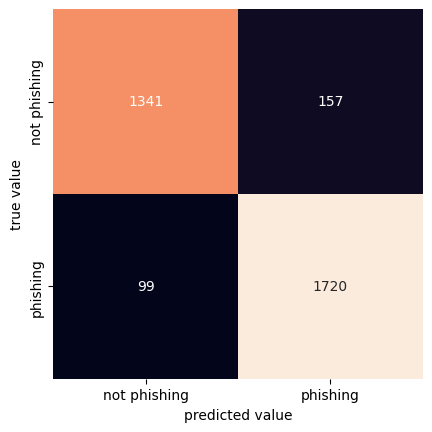

In [ ]:
# TO DO: Retrieve target vector and predicted values for testing set using full dataset and print the dimension of the predicted output (2 mark)
# Note: 70% training set, 30% testing set


# Define a function to calculate the necessary metrics for each scenario
# NOTE: Random State = 0

def calculate_metrics(X, y):
    # Split data into 70% training and 30% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Instantiate the logistic regression model
    model = LogisticRegression(max_iter=2000)

    # Fit the model to the training data
    model.fit(X_train, y_train.values.ravel())

    # Make predictions on the testing set
    y_test_pred = model.predict(X_test)

    # Get predicted probabilities for log loss calculation
    y_test_prob = model.predict_proba(X_test)

    # Calculate metrics
    data_size = X.shape[0]
    train_samples = X_train.shape[0]
    test_samples = X_test.shape[0]

    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate Log Loss
    train_log_loss = log_loss(y_train, model.predict_proba(X_train))
    test_log_loss = log_loss(y_test, y_test_prob)

    # # TO DO: Print confusion matrix (2 marks)
    conf_mat = confusion_matrix(y_test, y_test_pred)

    # # TO DO: Print classification report (2 marks)
    class_report = classification_report(y_test, y_test_pred)

    # Below code prints confusion matrix using a heatmap
    sns.heatmap(conf_mat, xticklabels=['not phishing', 'phishing'],  yticklabels=['not phishing', 'phishing'], square=True, annot=True, cbar=False, fmt='d')
    plt.xlabel('predicted value')
    plt.ylabel('true value')

# Print Confusion Matrix and Classification Report
    print(f"\nConfusion Matrix for the testing set (Scenario: Full dataset):")
    print(conf_mat)

    print(f"\nClassification Report for the testing set (Scenario: Full dataset):")
    print(class_report)

    # Print the shape of the predicted output (y_test_pred)
    print(f"Dimension of predicted output: {y_test_pred.shape}")

    return {
        'Data size': data_size,
        'Training samples': train_samples,
        'Testing samples': test_samples,
        'Training accuracy': train_accuracy,
        'Testing accuracy': test_accuracy,
        'Training log loss': train_log_loss,
        'Testing log loss': test_log_loss,
        'Confusion matrix': conf_mat,
        'Classification report': class_report
    }

# Initialize an empty list to store results for each scenario
results = []

# Define the scenarios and their respective datasets
scenarios = [
    {"name": "Scenario 1 -> Normal X and Y", "X": X, "y": y},  # Full dataset
    #{"name": "Scenario 2 -> First two columns of X and Y", "X": X.iloc[:, :2], "y": y},  # First two columns of X
    #{"name": "Scenario 3 -> X_small and y_small", "X": X_small, "y": y_small}  # Small dataset
]

# Loop through the scenarios, calculate metrics, and store results
for scenario in scenarios:
    scenario_name = scenario["name"]
    X_data = scenario["X"]
    y_data = scenario["y"]

    print(f"\n{scenario_name}:")

    # Call the function to get the results for this scenario
    metrics = calculate_metrics(X_data, y_data)

    # Append the results to the results list
    results.append(metrics)

    # Print the results for the scenario
    print(f"Data size: {metrics['Data size']}")
    print(f"Number of training samples: {metrics['Training samples']}")
    print(f"Number of testing samples: {metrics['Testing samples']}")
    print(f"Training accuracy: {metrics['Training accuracy'] * 100:.2f}%")
    print(f"Testing accuracy: {metrics['Testing accuracy'] * 100:.2f}%")
    print(f"Training log loss: {metrics['Training log loss']}")
    print(f"Testing log loss: {metrics['Testing log loss']}")
    print()

# Step 5.2: Create a pandas DataFrame to store results
results_df = pd.DataFrame(results, columns=['Data size', 'Training samples', 'Testing samples',
                                            'Training accuracy', 'Testing accuracy',
                                            'Training log loss', 'Testing log loss'])

# Display the results DataFrame
print("\nSummary Results:")
print(results_df)




In [ ]:
#see above

In [ ]:
#see above


### Questions (11 marks)
1. Is the dataset imbalanced? Does it affect model performance? (1 mark)
2. Does the model overfit or underfit for each of the 3 cases? (3 marks)
3. How do the training and testing accuracy change depending on the amount of data used? Explain with values. (1 mark)
4. In this case, what do a false positive and a false negative represent? Which one is worse? (2 marks)
5. Based on your answer to question 4, would you want to maximize precision or recall? How would you do this? (2 marks)
6. Based on the Log Loss for each of the 3 cases, what can you say about the model in each instance? What is potentially causing these differences? (2 mark)


ANSWER HERE

---
---
**QUESTION(1)**  

Based on the confusion matrix, Class -1 (negative class) has 1341 true negatives and 157 false positives. Class 1 (positive class) has 1720 true positives and 99 false positives. The class distripution is: Class -1: 1498 samples and Class 1: 1819 samples. This is a minor class imbalance, with Class 1 frequency > Class -1, with the ratio roughly 1:1.2. The model appears to perform well in both classes, as shown by teh high precision, recall and F-1 scores for both classes. Model perfomance is not significantly impacted by teh minor imbalance, as indicated by the relatively high accuracy, precision and recall for both classes. Further, the classification report shows that the mode; is capable of corrrctly identifying both classes with high recall and precision.


**QUESTION(2)**

Scenario 1 (Normal X and y): Training accuracy is 93.23% and testing accurancy is 92.28%; both are high and close to one another, suggestng that the model in neither overfitting nor underfitting.

Scenario 2 (First two columns of X and Y): Training accuracy is 56.28% and testing accuracy is 55.68%; This suggests that the model is underfitting due to the fewer features and less data for training.

Scenario 3 (X_small and y_small): Training accurancy is 97.41% and testing accuracy is 89.00%; both are high but once again there is a minor drop in the testing accuracy, suggesting mild underfitting.Likely due to the fewer samples.


**QUESTION(3)**

The training accuracy is highest in Scenario 3 (97.41% and training datasize 232), then Scenario 1 (92.23% and training datasize 7738) and lowest in Scenario 2 (56.28% and training datasize 7738 and reduced features). One could hyptohesize that the smaller data set makes it easier for the model to ft perfectly.

The testing accuracy is highest with in Scenario 1 (92.29%) which is slighlty higher than Scenario 3 (89.00%), however when the number of features drop in Scenario2 , so does the testing accuracy (55.68%). This suggests that the larger the dataset and feature number, the greater the testing accuracy wil be.


**QUESTION(4)**

A false positive occurs when the model predicts the sample as positive (1), when it is actually negative (-1).In this scenario, a false positive would mean classifying a non-phishing website as a phishing website.

A false negative occurs when the model predicts the sample as negative (-1), when it is actually positive (1).A false negative would mean classifying a phishing website as a non-phishing website.

In the context of phishing website detection, a false negative is worse than a false positive because missing a phishing website (i.e., classifying it as safe) could lead to significant security risks. False positives, on the other hand, may cause some inconvenience by falsely flagging a safe website, but they are less critical in terms of overall security.


**QUESTION (5)**

Since in this case, false negatives are worse, you would want to maximize recall, which is the ability to correctly identify positive samples (phishing wesites).

To do this, you would adjust the model's decision threshold to be more lenient in classifying a website as phishing, thereby increasing the number of true positives (and minimizng false negatives). You could also look at oversampling the minority class (phishing websites) or adjusting teh class weights to penalize false negatives more heavily.


**QUESTION (6)**

The log loss measures how well the model's predcted probabilities match the actual outcomes. Lower log loss indicates better performance.

Scenario 1. Normal X and Y
Training log loss 0.176
Testing log loss 0.190
Data size 11055

The log loss is relatively low for both training and testing sets, which indicates that the model is providing confident predictions that align well wth true labels.

Scenario 2. First two columns
Training log loss 0.678
Testing log loss 0.683
Data size 11055

Here, the log loss increases compared to Scenario 1, indicating that with fewer features (only the first two columns), the model is less certain and less accurate. Despite having the same data size as Scenario 1, the reduced feature set leads to worse model performance, as reflected in the higher log loss for both training and testing sets.

Scenario 3. X_small and y_small
Training log loss 0.103
Testing log loss 0.212
Data size 2000

The lower training log loss indicates that the model is making relatively confident predictions on the training set in comparision to teh other two scenarios, while the higher testing log loss suggests that the model's generalization to unseen data is somewhat weaker.
